In [1]:
import pandas as pd

from collections import Counter
from gensim.corpora import Dictionary
from gensim.models import LdaMulticore
from sklearn.feature_extraction.text import TfidfVectorizer

In [2]:
import nltk
from nltk import ngrams

In [3]:
df = pd.read_csv('preprocessed_data.csv')

In [4]:
df['transcript']

0      ['pregunta', 'invierno', 'españa', 'ejemplo', ...
1      ['ayer', 'alguien', 'alguien', 'pasar', 'canal...
2      ['soldado', 'dio', 'lobo', 'seguir', 'esperar'...
3      ['apetecer', 'álbum', 'for', 'night', 'tipo', ...
4      ['tendrás', 'parar', 'directo', 'pueda', 'cena...
                             ...                        
116    ['chaval', 'descargar', 'juego', 'real', 'desc...
117    ['querer', 'reactiva', 'clip', 'favor', 'sabéi...
118    ['argentino', 'concha', 'lora', 'argentino', '...
119    ['opción', 'zona', 'rattus', 'rattus', 'zorrar...
120    ['músicar', 'belleza', 'farga', 'querer', 'chi...
Name: transcript, Length: 121, dtype: object

In [5]:
occurrences_per_transcript = df['transcript'].str.count(r'xxxx')

# Calculate total occurrences
total_insults = occurrences_per_transcript.sum()

# Calculate average occurrence per transcript
average_occurrence = total_insults / len(df)

print(f"Average occurrences of 'xxxx' per transcript: {average_occurrence:.2f}")
print(f"Total occurrences of 'xxxx' per transcript: {total_insults:.2f}")

Average occurrences of 'xxxx' per transcript: 8.37
Total occurrences of 'xxxx' per transcript: 1013.00


In [6]:
import ast

processed_transcripts = df['transcript'].apply(ast.literal_eval)


In [7]:
type(processed_transcripts)

pandas.core.series.Series

In [8]:
# 1. Identify commonly used phrases using N-grams
all_ngrams = [ngram for transcript in processed_transcripts for ngram in ngrams(transcript, 3)]  # trigrams
common_phrases = Counter(all_ngrams).most_common(20)
print("Common Phrases:")
for phrase, freq in common_phrases:
    print(f"{' '.join(phrase)}: {freq}")

Common Phrases:
mamá mamá mamá: 72
bla bla bla: 63
música música música: 25
pacer pacer pacer: 24
música aplauso música: 20
ok ok ok: 17
xxxx xxxx xxxx: 16
alto alto alto: 14
ja ja ja: 13
porro porro porro: 12
sexo sexo sexo: 12
truf truf truf: 10
aplauso música aplauso: 10
hola hola hola: 9
na na na: 9
música i música: 8
valer valer valer: 8
ay ay ay: 8
cuidado cuidado cuidado: 7
ver ver ver: 7


In [9]:
# 2. Identify topics using LDA
dictionary = Dictionary(processed_transcripts)
corpus = [dictionary.doc2bow(transcript) for transcript in processed_transcripts]
lda_model = LdaMulticore(corpus, id2word=dictionary, num_topics=5, passes=15, workers=4)
print("\nTopics:")
for idx, topic in lda_model.print_topics(-1):
    print(f"Topic: {idx}, Words: {topic}")


Topics:
Topic: 0, Words: 0.016*"xxxx" + 0.008*"decir" + 0.007*"cosa" + 0.007*"gente" + 0.006*"año" + 0.006*"música" + 0.006*"ver" + 0.006*"tío" + 0.005*"gustar" + 0.005*"vídeo"
Topic: 1, Words: 0.019*"música" + 0.015*"xxxx" + 0.009*"ver" + 0.008*"querer" + 0.008*"favor" + 0.007*"bla" + 0.007*"casa" + 0.006*"risa" + 0.006*"decir" + 0.005*"aplauso"
Topic: 2, Words: 0.029*"música" + 0.021*"xxxx" + 0.011*"querer" + 0.010*"ver" + 0.008*"gente" + 0.007*"tío" + 0.006*"valer" + 0.006*"decir" + 0.005*"gustar" + 0.005*"vida"
Topic: 3, Words: 0.015*"música" + 0.014*"xxxx" + 0.009*"mamá" + 0.008*"ver" + 0.007*"querer" + 0.005*"tío" + 0.005*"año" + 0.005*"vídeo" + 0.004*"casa" + 0.004*"valer"
Topic: 4, Words: 0.011*"xxxx" + 0.009*"música" + 0.008*"tío" + 0.008*"querer" + 0.008*"pasar" + 0.005*"ver" + 0.005*"decir" + 0.005*"cosa" + 0.005*"tener" + 0.004*"vídeo"


In [10]:
# 3. Identify unique terms/values using TF-IDF
tfidf_vectorizer = TfidfVectorizer(max_df=0.85)
tfidf_matrix = tfidf_vectorizer.fit_transform([' '.join(transcript) for transcript in processed_transcripts])
feature_names = tfidf_vectorizer.get_feature_names_out()
sorted_items = sorted(list(enumerate(tfidf_matrix.sum(axis=0).tolist()[0])), key=lambda x: x[1], reverse=True)
print("\nUnique Terms:")
for idx, score in sorted_items[:10]:
    print(f"{feature_names[idx]}: {score}")



Unique Terms:
querer: 5.490107482055668
decir: 4.5573822269256485
tío: 4.510018706649683
gente: 4.271171650855942
risa: 3.836827403112801
valer: 3.690208382491735
cosa: 3.611962887168945
gustar: 3.4727044494499992
favor: 3.4681417729351876
pasar: 3.4118088991494324


In [11]:
all_tokens = [token for transcript in processed_transcripts for token in transcript]

# Count the occurrences of each token
word_freq = Counter(all_tokens)

# Display the 10 most common words and their frequencies
most_common_words = word_freq.most_common(15)
print(most_common_words)

# If you prefer the output in a DataFrame
df_word_freq = pd.DataFrame(most_common_words, columns=['Word', 'Frequency'])
print(df_word_freq)

[('música', 1056), ('xxxx', 1013), ('ver', 481), ('querer', 474), ('tío', 367), ('decir', 362), ('gente', 349), ('cosa', 298), ('gustar', 270), ('valer', 266), ('pasar', 262), ('vídeo', 223), ('vida', 214), ('estar', 208), ('año', 204)]
      Word  Frequency
0   música       1056
1     xxxx       1013
2      ver        481
3   querer        474
4      tío        367
5    decir        362
6    gente        349
7     cosa        298
8   gustar        270
9    valer        266
10   pasar        262
11   vídeo        223
12    vida        214
13   estar        208
14     año        204


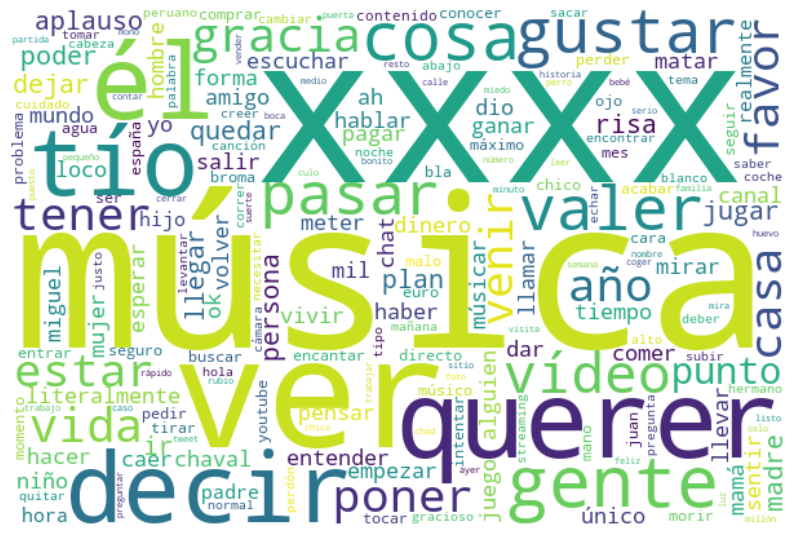

In [12]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# Convert the list of tokens back into a single string for each transcript
all_text = ' '.join([' '.join(transcript) for transcript in processed_transcripts])

# Generate the word cloud.
wordcloud = WordCloud(background_color="white",  # Set the background color to white
                      width=600,                # Width of the canvas
                      height=400,               # Height of the canvas
                      collocations=False,       # Avoid duplicate words
                      colormap='viridis'        # Color scheme
                     ).generate(all_text)

# Plot the word cloud.
plt.figure(figsize=(10, 8))      
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")

# Save the visualization to a file.
plt.savefig("transcript_wordcloud.png")

plt.show()